<a href="https://colab.research.google.com/github/iBoxerman/tf-intro/blob/colab/TF_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started

In [8]:
import numpy as np

In [1]:
!pwd
!cd /
!ls -l

/content
total 4
drwxr-xr-x 1 root root 4096 Feb 18 14:33 sample_data


In [2]:
print("Hello world!")

Hello world!


# Celsius TO Fhrenheit

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype=float)
for i,c in enumerate(celsius_q):
  print(f'{c}^c, {fahrenheit_a[i]}^f')

Assembling layers

In [7]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

Compiling

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Training

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


displaying the trainging statistics

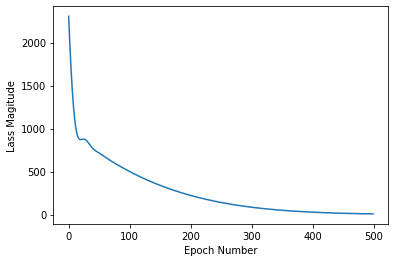

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel('Lass Magitude')
plt.plot(history.history['loss'])

Prediction

In [12]:
print(model.predict([100.0]))

[[211.32944]]


Looking at the layer weights

In [13]:
print(f'These are the layer vars {l0.get_weights()}')

These are the layer vars [array([[1.8217945]], dtype=float32), array([29.15], dtype=float32)]
